<a href="https://colab.research.google.com/github/vladi29/ANA-Classifier/blob/main/preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Universidad Simon Bolivar - 21 de Enero de 2022
# Trabajo final de grado: Clasificador de patrones ANA
# Vladimir Alfaro - 1510023

# Preprocesamiento de las imagenes

import pandas as pd
import time
import cv2
from torchvision import transforms
import random
import numpy as np
from matplotlib import pyplot as plt
import albumentations as Alb
import os

In [2]:
# Directorios

#%cd drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database/
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/AIDA_HEp2_GroundTruth.xlsx'
images_path = 'drive/MyDrive/Colab_Notebooks/Tesis/aida_project_database'

df = pd.read_excel(labels_path, header = 0)
shuffled_df = df.sample(frac = 1).reset_index(drop = True)
shuffled_df.to_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')

data = pd.read_excel('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/shuffled_images.xlsx')
labels_list = data['StainingPatterns'].values.tolist()
images_raw = data['ImageFileName'].values.tolist()
images_names = []
for name in images_raw:
  name = name.lower()
  images_names.append(name)

#print(labels_list)

In [3]:
# Data agumentation

augmented_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
print(os.listdir(augmented_path))
transform = Alb.Compose(
    [
     Alb.Rotate(limit=30, p=1.0, border_mode=cv2.BORDER_CONSTANT),
     Alb.HorizontalFlip(p=0.5),
     Alb.VerticalFlip(p=0.5),
    ]
)

start_time = time.time()
augmented_labels = []
augmented_names = []
i = 0
for image_name in images_names:
    label = labels_list[i]
    image_path = images_path + '/' + image_name
    image = cv2.imread(image_path)
    green_channel = image[:,:,1]                                        # Extraemos el canal verde de de cada imagen
    image = np.zeros(image.shape)                                       # Imagen vacia
    image[:,:,1] = green_channel                                        # Sustituimos el canal verde en la imagen vacia, [2]
    image = (image - np.min(image))/(np.max(image) - np.min(image))     # Preprocesamiento para evitar ruido y normalizar cada canal, [2] y [8]
    image = cv2.resize(image, (224, 224))                               # Tamaño de las imagenes (ancho, alto) | 224x224 es el tama;o minimo de los modelos famosos en pytorch
    image_name = image_name.split('.')[0]
    #cv2.imwrite(augmented_path+image_name+'_0.jpg', image)
    np.savez_compressed(augmented_path+image_name+'_0.npz', image)
    augmented_labels.append(label)
    augmented_names.append(image_name+'_0.npz')
    for factor in range(0,4):
      augmented_image = transform(image = image)['image']
      #cv2.imwrite(augmented_path+image_name+"_"+str(factor+1)+'.jpg', augmented_image)
      np.savez_compressed(augmented_path+image_name+"_"+str(factor+1)+'.npz', augmented_image)
      augmented_labels.append(label)
      augmented_names.append(image_name+"_"+str(factor+1)+'.npz')
    i += 1
    print("Imagenes procesadas: ", i)

final_time = time.time() - start_time

labels = np.asarray(augmented_labels)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv', labels, fmt ='%s', delimiter = ',')

names = np.asarray(augmented_names)
np.savetxt('drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv', names, fmt ='%s', delimiter = ',')

print('Tiempo de preprocesado de las imagenes:', round(final_time/60, 3))
print('Cantidad total de imagenes: ', len(augmented_names))
print('Cantidad total de etiquetas: ', len(augmented_labels))

[]
Imagenes procesadas:  1
Imagenes procesadas:  2
Imagenes procesadas:  3
Imagenes procesadas:  4
Imagenes procesadas:  5
Imagenes procesadas:  6
Imagenes procesadas:  7
Imagenes procesadas:  8
Imagenes procesadas:  9
Imagenes procesadas:  10
Imagenes procesadas:  11
Imagenes procesadas:  12
Imagenes procesadas:  13
Imagenes procesadas:  14
Imagenes procesadas:  15
Imagenes procesadas:  16
Imagenes procesadas:  17
Imagenes procesadas:  18
Imagenes procesadas:  19
Imagenes procesadas:  20
Imagenes procesadas:  21
Imagenes procesadas:  22
Imagenes procesadas:  23
Imagenes procesadas:  24
Imagenes procesadas:  25
Imagenes procesadas:  26
Imagenes procesadas:  27
Imagenes procesadas:  28
Imagenes procesadas:  29
Imagenes procesadas:  30
Imagenes procesadas:  31
Imagenes procesadas:  32
Imagenes procesadas:  33
Imagenes procesadas:  34
Imagenes procesadas:  35
Imagenes procesadas:  36
Imagenes procesadas:  37
Imagenes procesadas:  38
Imagenes procesadas:  39
Imagenes procesadas:  40
Imagen

Nombre de la imagen:  60_2_0.npz
Etiqueta de la imagen:  CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled


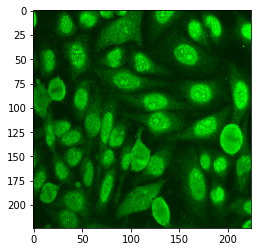

Nombre de la imagen:  60_2_1.npz
Etiqueta de la imagen:  CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled


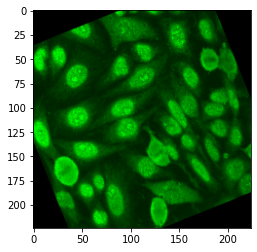

Nombre de la imagen:  60_2_2.npz
Etiqueta de la imagen:  CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled


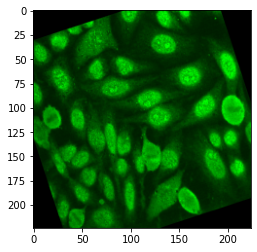

Nombre de la imagen:  60_2_3.npz
Etiqueta de la imagen:  CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled


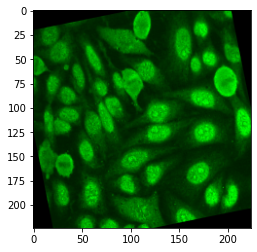

Nombre de la imagen:  60_2_4.npz
Etiqueta de la imagen:  CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled


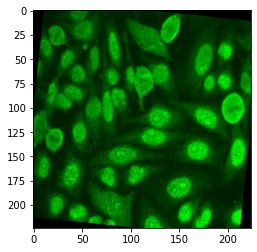

Nombre de la imagen:  404_1_0.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar


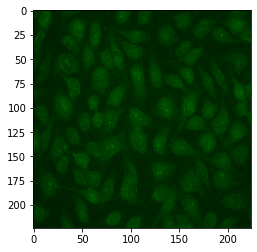

Nombre de la imagen:  404_1_1.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar


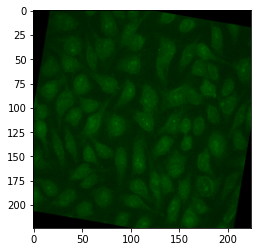

Nombre de la imagen:  404_1_2.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar


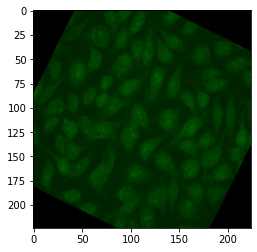

Nombre de la imagen:  404_1_3.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar


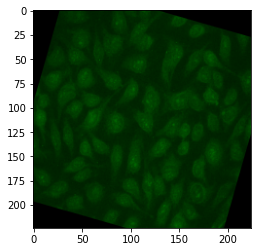

Nombre de la imagen:  404_1_4.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar


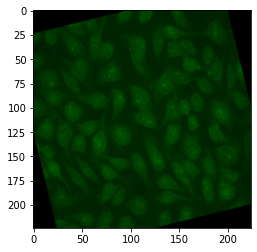

Nombre de la imagen:  284_3_0.npz
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


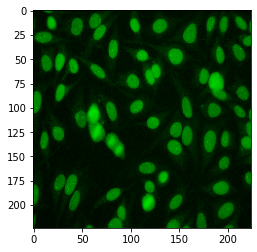

Nombre de la imagen:  284_3_1.npz
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


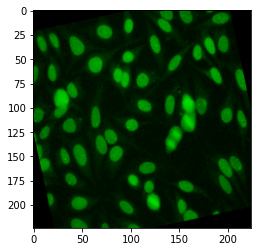

Nombre de la imagen:  284_3_2.npz
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


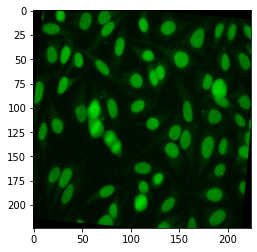

Nombre de la imagen:  284_3_3.npz
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


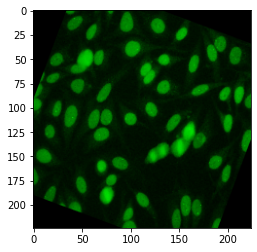

Nombre de la imagen:  284_3_4.npz
Etiqueta de la imagen:  NuclearHomogeneous_FewNuclearDots


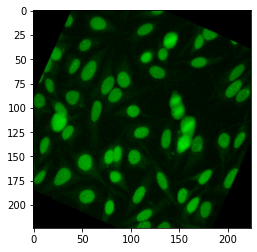

Nombre de la imagen:  333_1_0.npz
Etiqueta de la imagen:  NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA


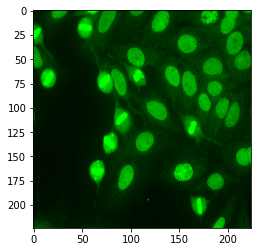

Nombre de la imagen:  333_1_1.npz
Etiqueta de la imagen:  NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA


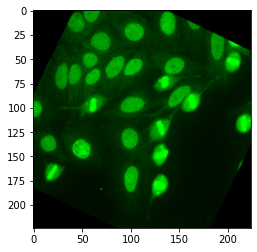

Nombre de la imagen:  333_1_2.npz
Etiqueta de la imagen:  NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA


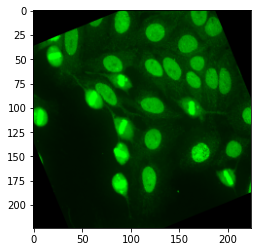

Nombre de la imagen:  333_1_3.npz
Etiqueta de la imagen:  NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA


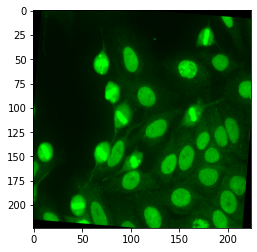

Nombre de la imagen:  333_1_4.npz
Etiqueta de la imagen:  NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA


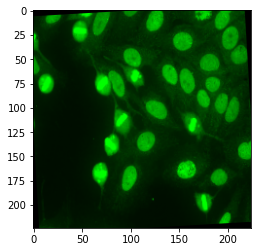

Nombre de la imagen:  410_2_0.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarSpeckled


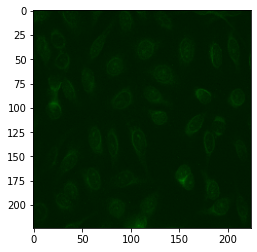

Nombre de la imagen:  410_2_1.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarSpeckled


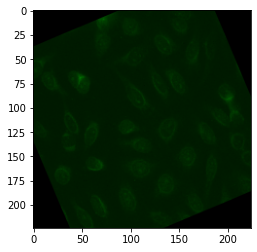

Nombre de la imagen:  410_2_2.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarSpeckled


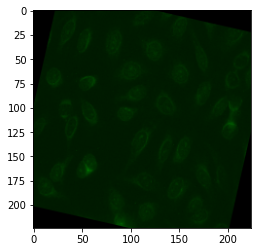

Nombre de la imagen:  410_2_3.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarSpeckled


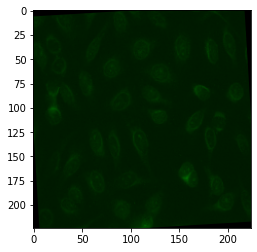

Nombre de la imagen:  410_2_4.npz
Etiqueta de la imagen:  NuclearMembranous_NucleolarSpeckled


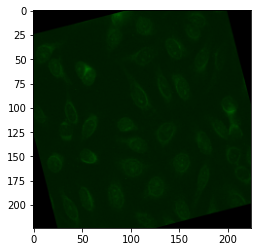

Nombre de la imagen:  932_1_0.npz
Etiqueta de la imagen:  Negative


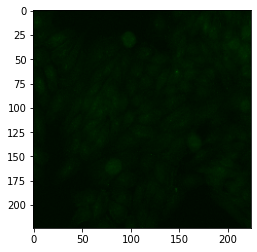

Nombre de la imagen:  932_1_1.npz
Etiqueta de la imagen:  Negative


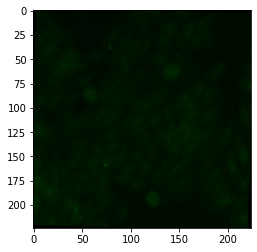

Nombre de la imagen:  932_1_2.npz
Etiqueta de la imagen:  Negative


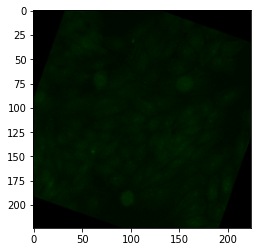

Nombre de la imagen:  932_1_3.npz
Etiqueta de la imagen:  Negative


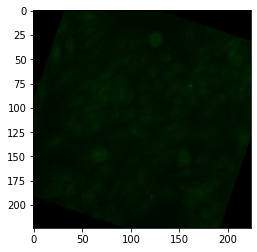

Nombre de la imagen:  932_1_4.npz
Etiqueta de la imagen:  Negative


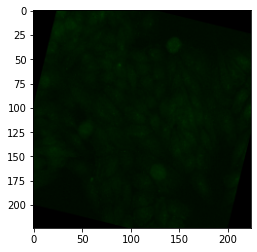

Nombre de la imagen:  176_3_0.npz
Etiqueta de la imagen:  FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA


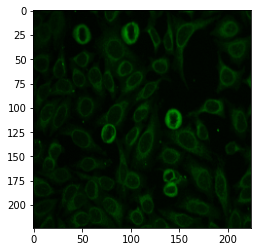

Nombre de la imagen:  176_3_1.npz
Etiqueta de la imagen:  FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA


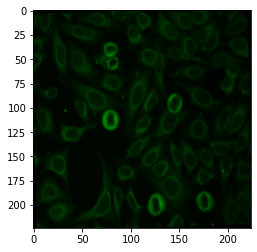

Nombre de la imagen:  176_3_2.npz
Etiqueta de la imagen:  FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA


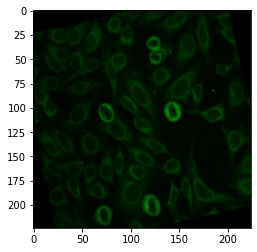

Nombre de la imagen:  176_3_3.npz
Etiqueta de la imagen:  FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA


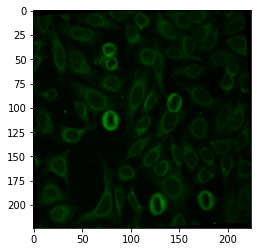

Nombre de la imagen:  176_3_4.npz
Etiqueta de la imagen:  FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA


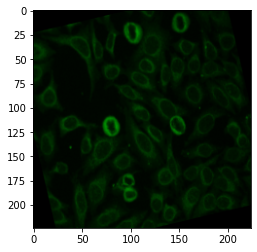

Nombre de la imagen:  930_1_0.npz
Etiqueta de la imagen:  Negative


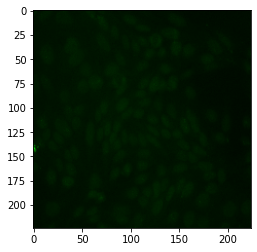

Nombre de la imagen:  930_1_1.npz
Etiqueta de la imagen:  Negative


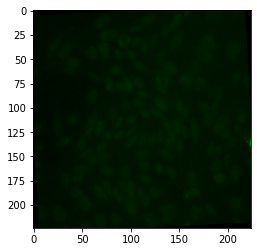

Nombre de la imagen:  930_1_2.npz
Etiqueta de la imagen:  Negative


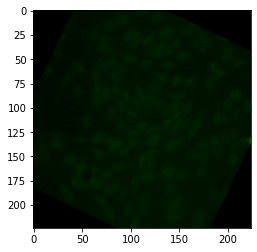

Nombre de la imagen:  930_1_3.npz
Etiqueta de la imagen:  Negative


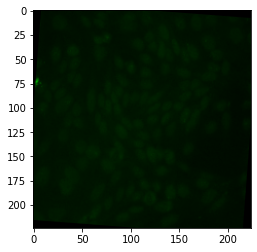

Nombre de la imagen:  930_1_4.npz
Etiqueta de la imagen:  Negative


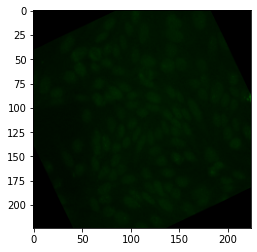

Nombre de la imagen:  393_3_0.npz
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


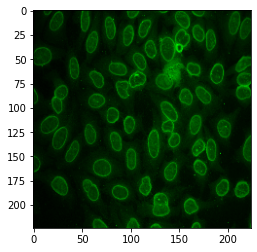

Nombre de la imagen:  393_3_1.npz
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


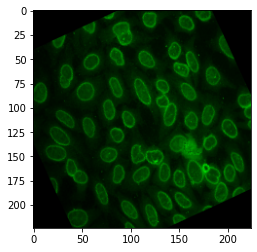

Nombre de la imagen:  393_3_2.npz
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


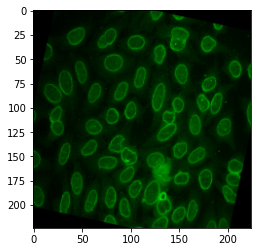

Nombre de la imagen:  393_3_3.npz
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


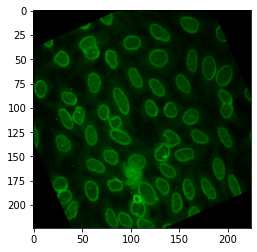

Nombre de la imagen:  393_3_4.npz
Etiqueta de la imagen:  NuclearMembranous_FineSpeckled


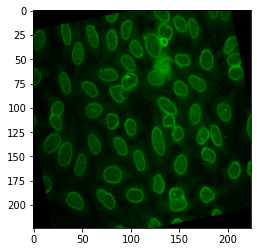

Nombre de la imagen:  7_5_0.npz
Etiqueta de la imagen:  Centromere


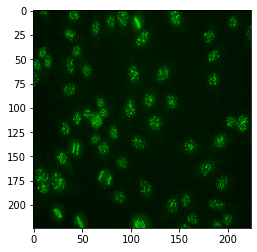

Nombre de la imagen:  7_5_1.npz
Etiqueta de la imagen:  Centromere


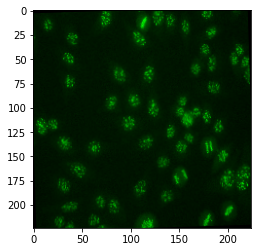

Nombre de la imagen:  7_5_2.npz
Etiqueta de la imagen:  Centromere


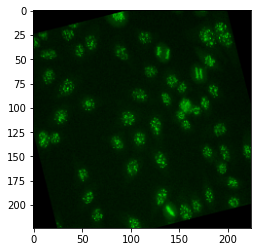

Nombre de la imagen:  7_5_3.npz
Etiqueta de la imagen:  Centromere


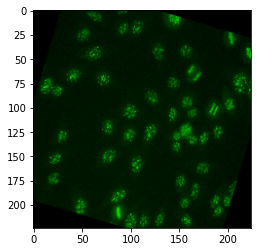

Nombre de la imagen:  7_5_4.npz
Etiqueta de la imagen:  Centromere


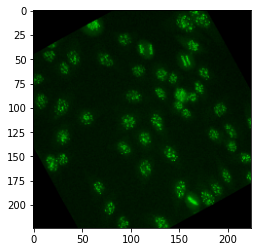

In [5]:
# Prove images with each label
images_path = r'drive/MyDrive/Colab_Notebooks/Tesis/Augmented_dataset/'
labels_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/labels.csv'
names_path = 'drive/MyDrive/Colab_Notebooks/Tesis/Preprocessing/names.csv'

labels_raw = pd.read_csv(labels_path, header = None)
labels_raw = labels_raw.values.tolist()
labels = []
for label in labels_raw:
  labels.append(label[0])

names = pd.read_csv(names_path, header = None)
names = names.values.tolist()

for i in range(0,50):
  label = augmented_labels[i]
  image_name = augmented_names[i]
  image_path = images_path + image_name
  image = np.load(image_path)
  image = image['arr_0']
  print("Nombre de la imagen: ", image_name)
  print("Etiqueta de la imagen: ", label)
  plt.imshow(image)
  plt.show()

In [6]:
#----------Get all labels----------
aux = ''
patterns = {}
for pattern in labels_list:
  if pattern != aux:
    patterns[pattern] = labels_list.count(pattern)
    aux = pattern
  else:
    continue

print(patterns)
print('Numero de patrones en el dataset: ', len(patterns))

{'CoarseSpeckled_NucleolarSpeckled_CytoplasmicSpeckled': 3, 'NuclearMembranous_NucleolarHomogeneous_CytoplasmicFibrillar': 3, 'NuclearHomogeneous_FewNuclearDots': 30, 'NuclearHomogeneous_MultipleNuclearDots_CytoplasmicReticularAMA': 11, 'NuclearMembranous_NucleolarSpeckled': 24, 'Negative': 581, 'FineSpeckled_NuclearMembranous_CytoplasmicReticularAMA': 6, 'NuclearMembranous_FineSpeckled': 26, 'Centromere': 26, 'FineSpeckled_CytoplasmicSpeckled': 23, 'NuclearHomogeneous_NucleolarHomogeneous_CytoplasmicReticularAMA': 15, 'NuclearHomogeneous_NucleolarClumpy': 24, 'CytoplasmicPolarGolgiLike': 21, 'FineSpeckled_NucleolarHomogeneous': 24, 'CoarseSpeckled_NucleolarClumpy': 9, 'MultipleNuclearDots_CytoplasmicReticularAMA': 24, 'FineSpeckled_CytoplasmicFibrillar': 28, 'NucleolarHomogeneous': 21, 'FineSpeckled_Centriole': 24, 'NuclearHomogeneous_FineSpeckled_CytoplasmicReticularAMA': 29, 'CoarseSpeckled': 21, 'NuclearMembranous_CytoplasmicReticularAMA': 14, 'NuclearMembranous_NucleolarClumpy': 1

In [7]:
#----------Verificar el estado de la memoria RAM----------
#!cat /proc/meminfo

In [ ]:
!jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10